In [1]:
import numpy as np
import pandas as pd

from matplotlib import patches
import matplotlib.pyplot as plt

from gr_pursuer.agents.target import Target
from gr_pursuer.agents.observer import Observer

from multigrid.envs.goal_prediction import GREnv


scenarios = pd.read_csv('gr_pursuer/data/64_distance_50_0/scenarios.csv')
# scenarios

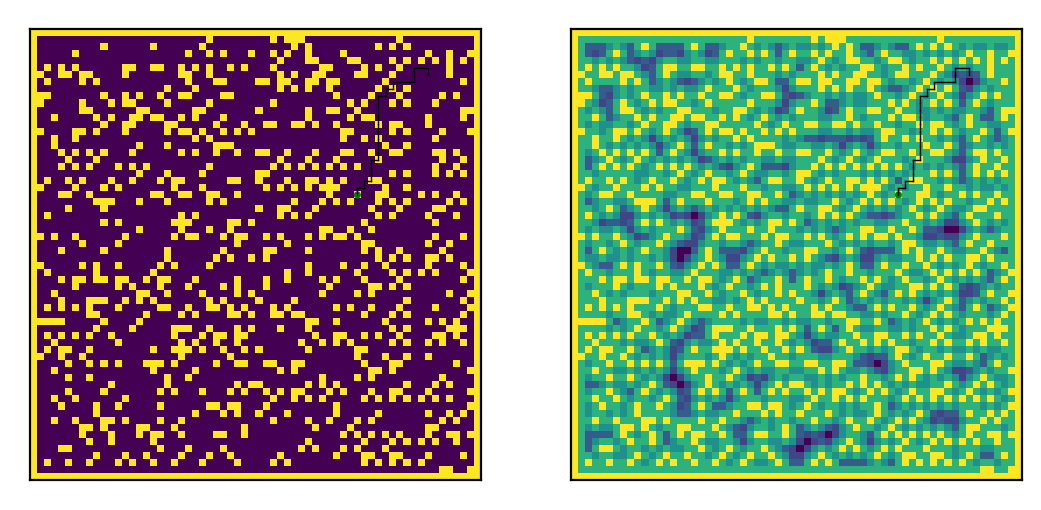

In [ ]:
scenario = scenarios.iloc[68]

base_grid = np.array(eval(scenario["base_grid"]))
goals = eval(scenario["goals"])
hidden_cost = np.array(eval(scenario["hidden_cost"]))
layout = scenario["layout"]
nscenario = scenario["scenario"]
agents_start_pos=scenario[["observer_pos", "target_pos"]].apply(eval).tolist()
agents_start_dir = scenario[['observer_dir', 'target_dir']].tolist()


env = GREnv(size=32, base_grid=base_grid, 
            see_through_walls=[False, True],
            agent_view_size=[5, 3],
            goals=goals, hidden_cost=hidden_cost, 
            agents_start_pos=agents_start_pos,
            agents_start_dir=agents_start_dir,
            # render_mode='human'
)

observations, infos = env.reset()
observer = Observer(env) # Green
target = Target(env) # Red
agents = [observer, target]

step = 0
target_failed = False

actions = {}
for i, agent in enumerate(agents):
    action = agent.compute_action(observations[i])
    if action is not None:
        actions[agent.agent.index] = int(action)
    else:
        if i==1:
            target_failed = True

# observations, rewards, terminations, truncations, infos = env.step(actions)

# Show base grid
fig, axs = plt.subplots(1, 2, dpi=200)  
# axs.matshow(world_map.semantic_grid[:,:,65])
# axs = [axs]

cost = (env.base_grid==2).astype(int)*1000 + target.hidden_cost*100

axs[0].matshow(env.base_grid)
axs[1].matshow(cost)

# Add goal patch
for ax in axs:
    position_patch = patches.Circle(env.goal, facecolor='g', fill=True, radius=0.5)
    ax.add_patch(position_patch)

    for i in range(0, len(target.path)-1, 1):
        p1 = target.path[i]
        p2 = target.path[i+1]
        x= [p1[0], p2[0]]
        y= [p1[1], p2[1]]
        ax.plot(x, y, 'k-', linewidth=0.5)

# Remove axis
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

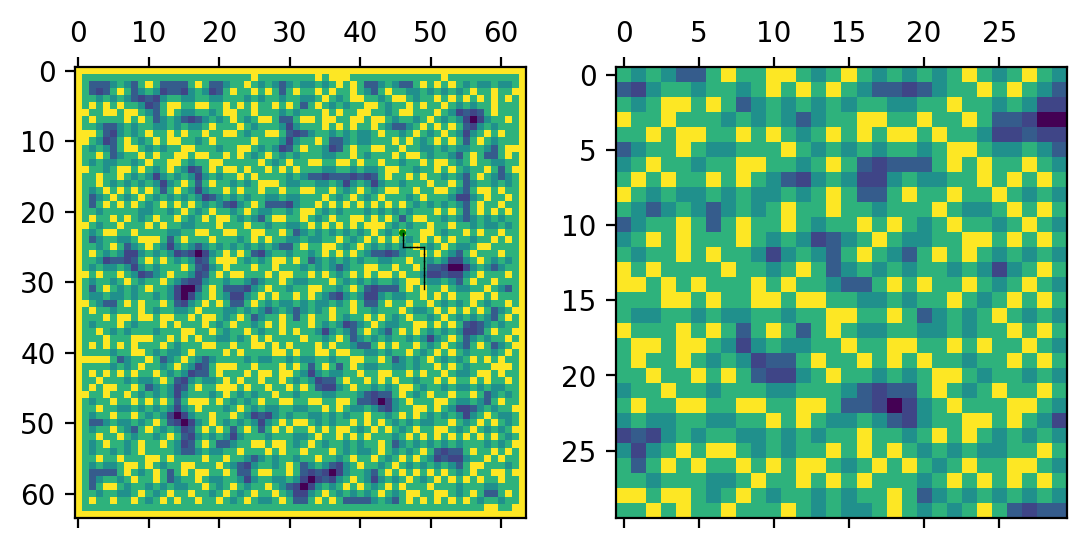

In [5]:
from gr_pursuer.astar import astar2d

path = astar2d(observations[1]["pos"], target.goal, cost)

fig, axs = plt.subplots(1, 2, dpi=200)  


axs[0].matshow(cost)
axs[1].matshow(cost[25:55,25:55])

# Add goal patch
# for ax in axs:
ax = axs[0]
position_patch = patches.Circle(env.goal, facecolor='g', fill=True, radius=0.5)
ax.add_patch(position_patch)

for i in range(0, len(target.path)-1, 1):
    p1 = target.path[i]
    p2 = target.path[i+1]
    x= [p1[0], p2[0]]
    y= [p1[1], p2[1]]
    ax.plot(x, y, 'k-', linewidth=0.5)


In [20]:
path

[[26, 42],
 [27, 42],
 [28, 42],
 [29, 42],
 [30, 42],
 [31, 42],
 [32, 42],
 [33, 42],
 [34, 42],
 [35, 42],
 [36, 42],
 [37, 42],
 [38, 42],
 [39, 42],
 [40, 42],
 [41, 42],
 [42, 42],
 [43, 42],
 [44, 42],
 [45, 42],
 [46, 42],
 [47, 42],
 [47, 43],
 [47, 44],
 [48, 44],
 [48, 45]]